In [22]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve, RocCurveDisplay, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import RidgeCV, LinearRegression

In [23]:
df = pd.read_csv("complete.csv", index_col=0)

classes = df["type"]
df = df.drop(columns="type")


In [24]:
x_train, x_test, y_train, y_test = train_test_split(df, classes, test_size=0.3, random_state=42, shuffle=True)
labels = ["bengin", "trojan", "worm", "backdoor", "encrypter", "downloader"]



# Random Forest

In [25]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

## Code to convert classes to binary

In [26]:
y_test_split = [[],[],[],[],[],[],[],[],[]]
y_pred_split = [[],[],[],[],[],[],[],[],[]]
y_test_bin = []
y_pred_bin = []

index = 0
while index < len(y_pred):
    if y_test[index] == y_pred[index]:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(1)
        y_test_bin.append(1)
        y_pred_bin.append(1)
    else:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(0)
        y_test_bin.append(0)
        y_pred_bin.append(1)
    index += 1

## Precision-Recall metric


In [27]:
labelIndex = 0
while labelIndex < len(labels):
    print(labels[labelIndex] + ":")
    print(str(precision_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    print(str(recall_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    labelIndex += 1



bengin:
0.96
0.9863013698630136
trojan:
0.5652173913043478
0.40625
worm:
0.42105263157894735
0.6153846153846154
backdoor:
0.9024390243902439
0.8705882352941177
encrypter:
0.0
0.0
downloader:
0.0
0.0


/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix

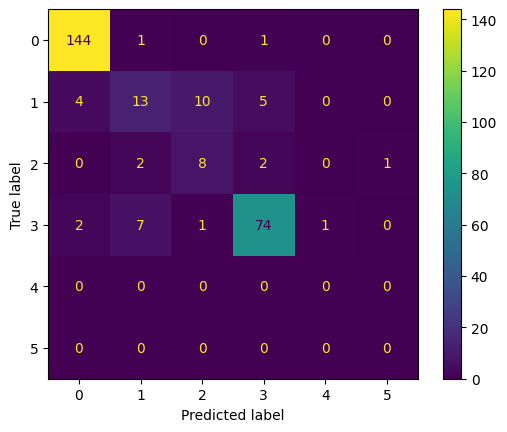

In [28]:
matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix)
cm_display.plot()
plt.show()

## Receiver Operating Characteristic

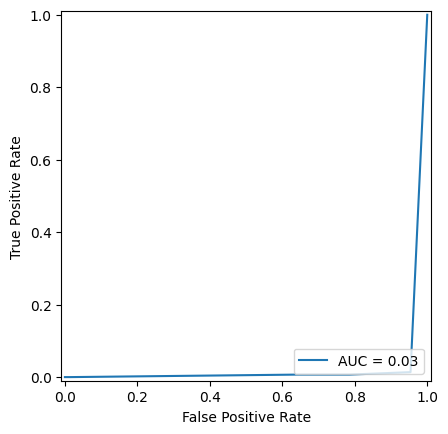

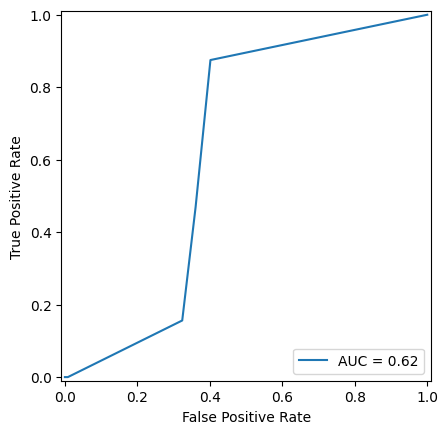

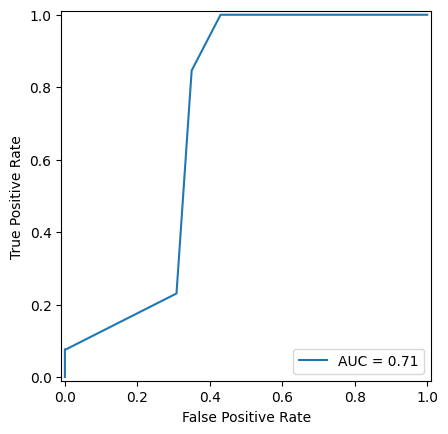

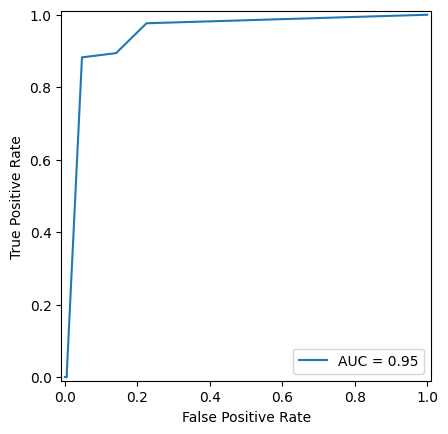

/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


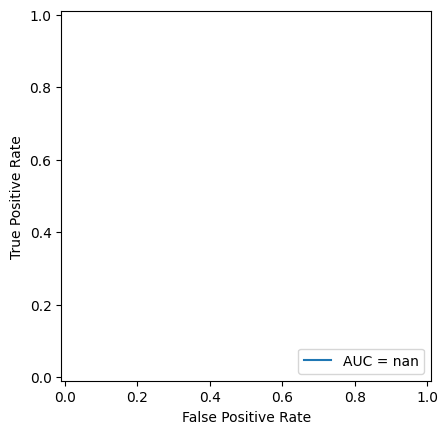

/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


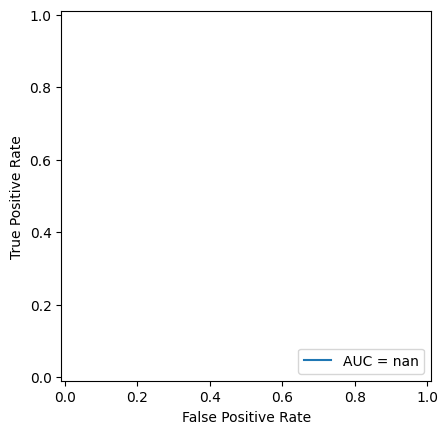

In [29]:
index = 0
while index < len(labels):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=index)
    roc_auc = auc(fpr, tpr)

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

    display.plot()

    plt.show()
    index += 1

## Accuracy

In [30]:
print(accuracy_score(y_test, y_pred))

0.8659420289855072


# Tree classifier

In [31]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

In [32]:
y_test_split = [[],[],[],[],[],[],[],[],[]]
y_pred_split = [[],[],[],[],[],[],[],[],[]]
y_test_bin = []
y_pred_bin = []

index = 0
while index < len(y_pred):
    if y_test[index] == y_pred[index]:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(1)
        y_test_bin.append(1)
        y_pred_bin.append(1)
    else:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(0)
        y_test_bin.append(0)
        y_pred_bin.append(1)
    index += 1

In [33]:
labelIndex = 0
while labelIndex < len(labels):
    print(labels[labelIndex] + ":")
    print(str(precision_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    print(str(recall_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    labelIndex += 1

bengin:
0.9793103448275862
0.9726027397260274
trojan:
0.52
0.40625
worm:
0.35
0.5384615384615384
backdoor:
0.9036144578313253
0.8823529411764706
encrypter:
0.0
0.0
downloader:
0.0
0.0


/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


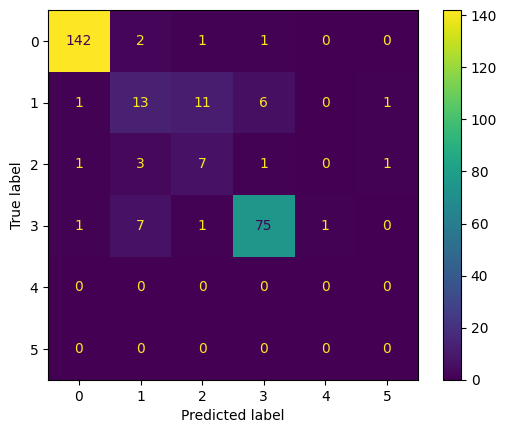

In [34]:
matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix)
cm_display.plot()
plt.show()

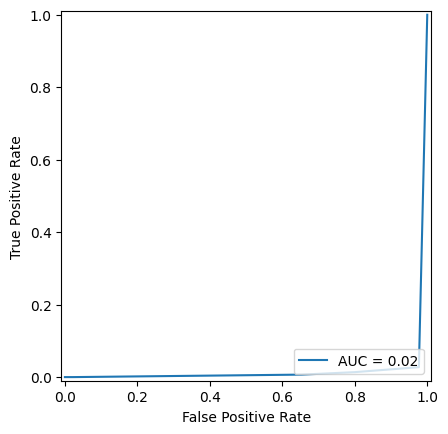

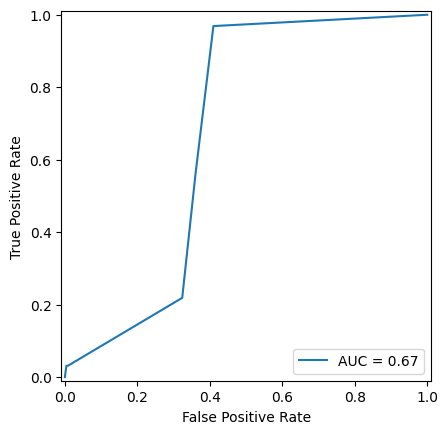

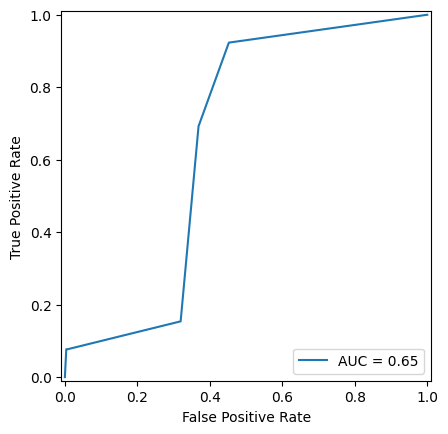

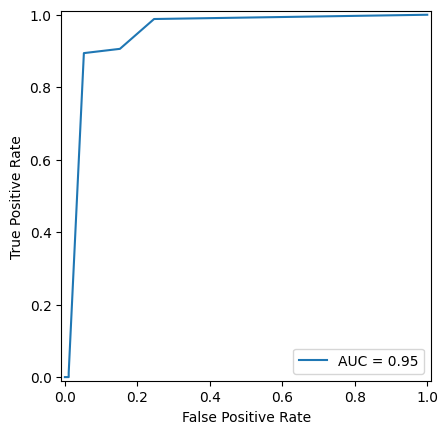

/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


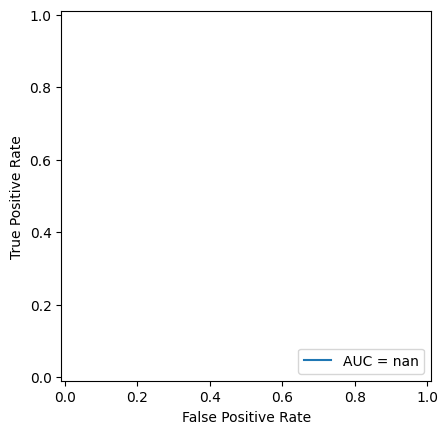

/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


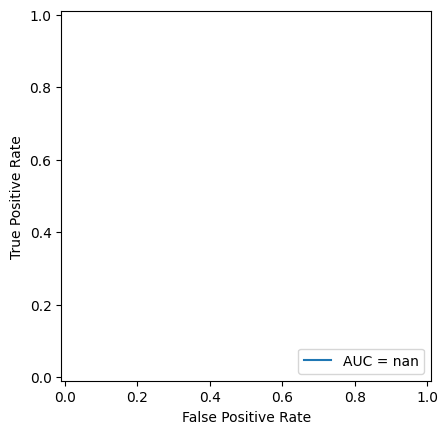

In [35]:
index = 0
while index < len(labels):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=index)
    roc_auc = auc(fpr, tpr)

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

    display.plot()

    plt.show()
    index += 1

In [36]:
print(accuracy_score(y_test, y_pred))

0.8586956521739131


# SVM

In [37]:
model = LinearSVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
y_test = np.array(y_test)

/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
y_test_split = [[],[],[],[],[],[],[],[],[]]
y_pred_split = [[],[],[],[],[],[],[],[],[]]
y_test_bin = []
y_pred_bin = []

index = 0
while index < len(y_pred):
    if y_test[index] == y_pred[index]:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(1)
        y_test_bin.append(1)
        y_pred_bin.append(1)
    else:
        y_test_split[y_test[index]].append(1)
        y_pred_split[y_test[index]].append(0)
        y_test_bin.append(0)
        y_pred_bin.append(1)
    index += 1

In [39]:
labelIndex = 0
while labelIndex < len(labels):
    print(labels[labelIndex] + ":")
    print(str(precision_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    print(str(recall_score(y_test, y_pred, labels=[labelIndex], average="macro")))
    labelIndex += 1



bengin:
0.9383561643835616
0.9383561643835616
trojan:
0.7272727272727273
0.25
worm:
0.5
0.38461538461538464
backdoor:
0.7735849056603774
0.9647058823529412
encrypter:
0.0
0.0
downloader:
0.0
0.0


/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

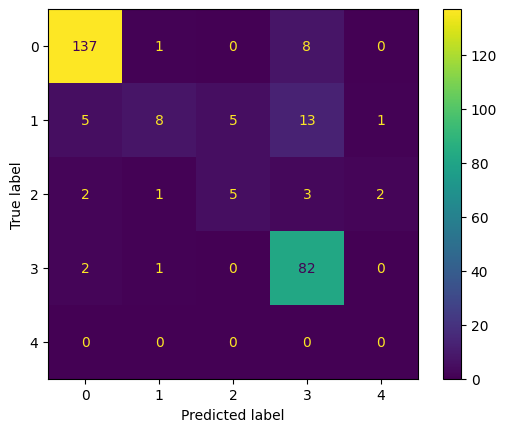

In [40]:
matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix)
cm_display.plot()
plt.show()

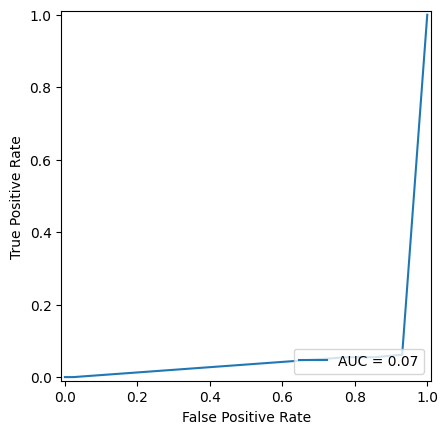

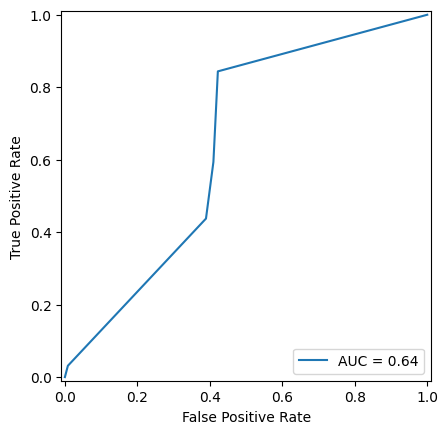

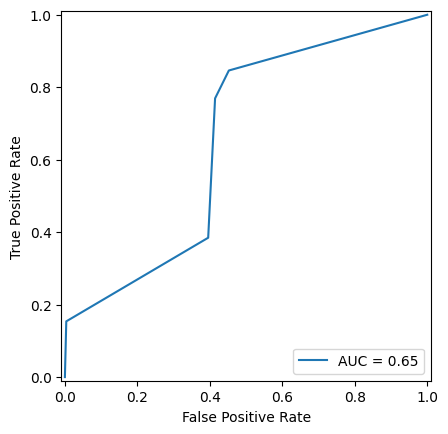

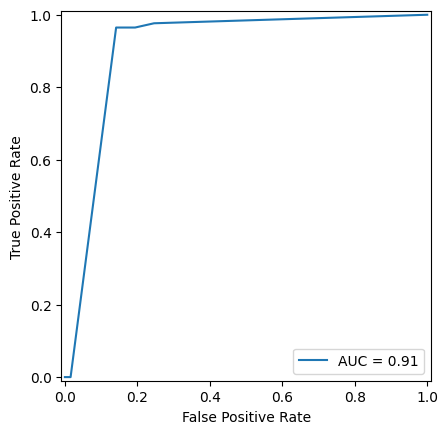

/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


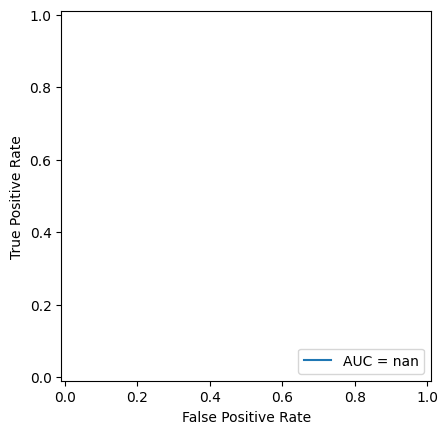

/home/oliver/Documents/Uni/SIT324/9.3HD/Submission/.venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


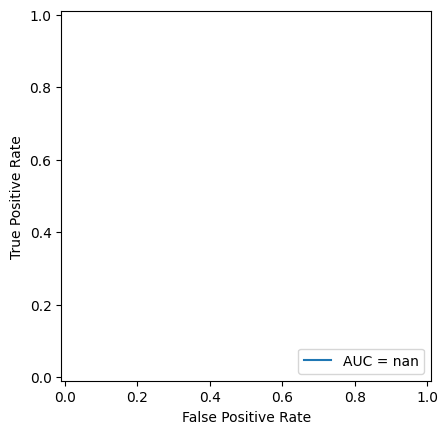

In [41]:
index = 0
while index < len(labels):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=index)
    roc_auc = auc(fpr, tpr)

    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)

    display.plot()

    plt.show()
    index += 1

In [42]:
print(accuracy_score(y_test, y_pred))

0.8405797101449275
